# LeNet-1

* [Oiriginal Paper](http://yann.lecun.com/exdb/publis/pdf/lecun-90c.pdf): Handwritten Digit Recognition with a Back-Propagation Network
* [Related Article on Medium](https://medium.com/@sh.tsang/paper-brief-review-of-lenet-1-lenet-4-lenet-5-boosted-lenet-4-image-classification-1f5f809dbf17)

In [15]:
import torch
import torch.nn as nn

class LeNet1(nn.Module):
    
    def __init__(self):
        super(LeNet1, self).__init__()
        
        # input is 28x28
        model_list = [
            # output is (28 - 5) + 1 = 24 => 4x24x24
            # there are 4 * (5 * 5 + 1) = 4 * 26 = 104 params to learn
            nn.Conv2d(1, 4, 5),
            nn.Tanh(),
            # output is 24/2 = 12 => 4x12x12
            nn.AvgPool2d(2),
            # output: 12 - 5 + 1 = 8 => 12x8x8
            # there are 12 * (5 * 5 * 4 + 1) = 1212 params to learn
            nn.Conv2d(4, 12, 5),
            nn.Tanh(),
            # output: 8/2 = 4 => 12x4x4
            nn.AvgPool2d(2)
        ]
        
        self.model = nn.Sequential(*model_list)
        # Parameters: (12*4*4 + 1)*10 = 1930
        self.fc = nn.Linear(12*4*4, 10)
        self.criterion = nn.CrossEntropyLoss()
    
    def forward(self, x):
        out = self.model(x)
        out = out.view(x.size(0), -1)
        out = self.fc(out)
        return out
        

In [7]:
import numpy as np
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

full_train_set = torchvision.datasets.MNIST(root = "./data", train = True, download = True, transform=transform)
test_set = torchvision.datasets.MNIST(root = "./data", train = False, download = True, transform=transform)

val_set, train_set = torch.utils.data.random_split(full_train_set, (10000, len(full_train_set) - 10000))
mini_train_set, mini_val_set = torch.utils.data.random_split(full_train_set, (100, len(full_train_set) - 100))
mini_val_set = torch.utils.data.Subset(mini_val_set, np.arange(0, 20))

tensor(1.)
tensor(-1.)


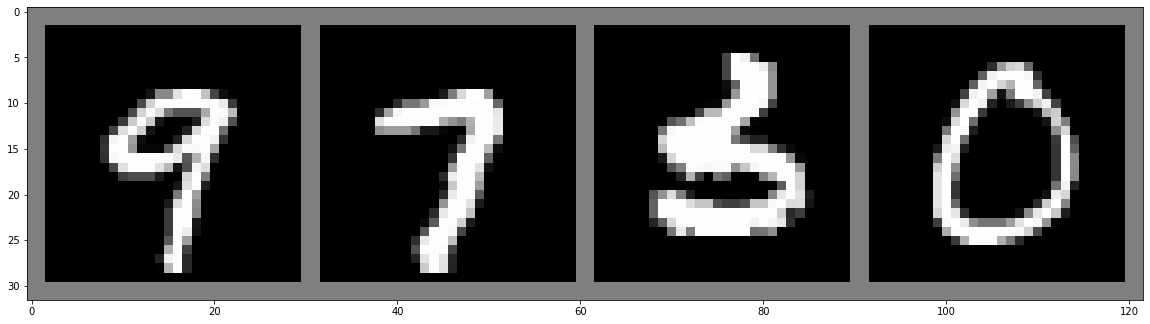

tensor(9) tensor(7) tensor(3) tensor(0)


In [9]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 15.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

tmploader = torch.utils.data.DataLoader(dataset = mini_train_set, shuffle = True, batch_size = 4, num_workers = 2)
dataiter = iter(tmploader)
images, labels = dataiter.next()

print(torch.max(images))
print(torch.min(images))

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % labels[j] for j in range(images.size(0))))

In [170]:
%load_ext autoreload
%autoreload 2

from src.solver import Solver
import torch.optim as optim

learning_rate = 0.01

net = LeNet1()
optimizer = optim.SGD(net.parameters(), lr=learning_rate)

options = {
    "train_data_loader": {
        "shuffle": True,
        "batch_size": 16,
        "num_workers": 4
    },
    "val_data_loader": {
        "shuffle": True,
        "batch_size": 16,
        "num_workers": 4
    },
    "back_up_model_every": 100,
    "epochs": 250
}

solver = Solver(net, mini_train_set, mini_val_set, **options)
solver.train(optimizer)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Training for 250 epochs
Epoch[0]  train_loss=2.319448096411569  val_loss=2.29379940032959
Epoch[1]  train_loss=2.3150341510772705  val_loss=2.2838339805603027
Epoch[2]  train_loss=2.292373384748186  val_loss=2.2573792934417725
Epoch[3]  train_loss=2.280867542539324  val_loss=2.2370352745056152
Epoch[4]  train_loss=2.261405876704625  val_loss=2.2118040323257446
Epoch[5]  train_loss=2.2445200170789446  val_loss=2.234663963317871
Epoch[6]  train_loss=2.2316980361938477  val_loss=2.236057996749878
Epoch[7]  train_loss=2.2114778586796353  val_loss=2.2092254161834717
Epoch[8]  train_loss=2.2164645535605296  val_loss=2.1698235273361206
Epoch[9]  train_loss=2.1829466138567244  val_loss=2.151121497154236
Epoch[10]  train_loss=2.145180719239371  val_loss=2.128147840499878
Epoch[11]  train_loss=2.142432655606951  val_loss=2.1130170822143555
Epoch[12]  train_loss=2.144396185874939  val_loss=2.1323299407958984
E

Epoch[116]  train_loss=0.34631867493901936  val_loss=0.6441948711872101
Epoch[117]  train_loss=0.3625539243221283  val_loss=0.5761425793170929
Epoch[118]  train_loss=0.3102475702762604  val_loss=0.4840988516807556
Epoch[119]  train_loss=0.3150857410260609  val_loss=0.4955713748931885
Epoch[120]  train_loss=0.3099797921521323  val_loss=0.4656544625759125
Epoch[121]  train_loss=0.29451102763414383  val_loss=0.5014047026634216
Epoch[122]  train_loss=0.3268141874245235  val_loss=0.4876162111759186
Epoch[123]  train_loss=0.30060307468686787  val_loss=0.45223788917064667
Epoch[124]  train_loss=0.3242998740502766  val_loss=0.4683216065168381
Epoch[125]  train_loss=0.2925502210855484  val_loss=0.5060475617647171
Epoch[126]  train_loss=0.2905114548546927  val_loss=0.5186217874288559
Epoch[127]  train_loss=0.2864758436168943  val_loss=0.4703492820262909
Epoch[128]  train_loss=0.27577229269913267  val_loss=0.4175095409154892
Epoch[129]  train_loss=0.30236332544258665  val_loss=0.3863232135772705


Epoch[231]  train_loss=0.1426586295877184  val_loss=0.3872119039297104
Epoch[232]  train_loss=0.13112867091383254  val_loss=0.35106484591960907
Epoch[233]  train_loss=0.12911082059144974  val_loss=0.4128606468439102
Epoch[234]  train_loss=0.1349793587412153  val_loss=0.2912607342004776
Epoch[235]  train_loss=0.13010715693235397  val_loss=0.4293306767940521
Epoch[236]  train_loss=0.1267626072679247  val_loss=0.3493077903985977
Epoch[237]  train_loss=0.13694937846490315  val_loss=0.3508252948522568
Epoch[238]  train_loss=0.12288561037608556  val_loss=0.41647596657276154
Epoch[239]  train_loss=0.12695189458983286  val_loss=0.3930318206548691
Epoch[240]  train_loss=0.13195011445454188  val_loss=0.28157876431941986
Epoch[241]  train_loss=0.12375453540257045  val_loss=0.3047364056110382
Epoch[242]  train_loss=0.14882531336375646  val_loss=0.4348707050085068
Epoch[243]  train_loss=0.12210301948445183  val_loss=0.42355066537857056
Epoch[244]  train_loss=0.13664666137525014  val_loss=0.34923349

In [10]:
def box_smooth(data, length):
    box = np.ones(length)/length
    smooth_data = np.convolve(data, box, mode="same")
    return smooth_data

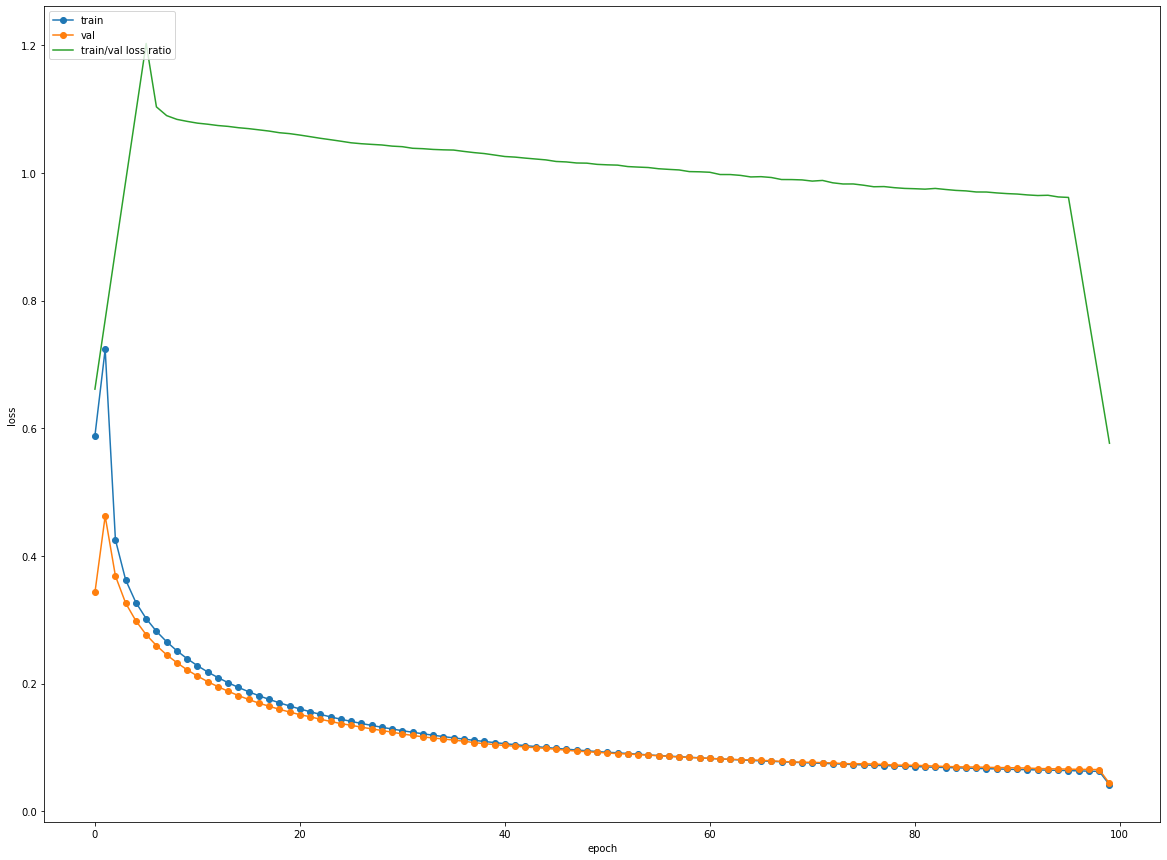

In [196]:
train_val_loss_ratio = torch.div(torch.tensor(solver.train_loss_history), torch.tensor(solver.val_loss_history))

sma_len = 3

plt.plot(box_smooth(solver.train_loss_history, sma_len), '-o')
plt.plot(box_smooth(solver.val_loss_history, sma_len), '-o')
plt.plot(box_smooth(train_val_loss_ratio, 10))
plt.legend(['train', 'val', 'train/val loss ratio'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [203]:
%load_ext autoreload
%autoreload 2

from src.solver import Solver
import torch.optim as optim

learning_rate = 0.01

net = LeNet1()
optimizer = optim.SGD(net.parameters(), lr=learning_rate)

options = {
    "train_data_loader": {
        "shuffle": True,
        "batch_size": 64,
        "num_workers": 3
    },
    "val_data_loader": {
        "shuffle": True,
        "batch_size": 64,
        "num_workers": 3
    },
    "back_up_model_every": 50,
    "epochs": 300
}

solver = Solver(net, train_set, val_set, **options)
solver.train(optimizer)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Training for 300 epochs
Epoch[0]  train_loss=1.3189322493417794  val_loss=0.6225273100433836
Epoch[1]  train_loss=0.5119350289597231  val_loss=0.44154160645357365
Epoch[2]  train_loss=0.4087804166785896  val_loss=0.37736456618187536
Epoch[3]  train_loss=0.36008174023817263  val_loss=0.3385353147698815
Epoch[4]  train_loss=0.32823620816630783  val_loss=0.3124874909022811
Epoch[5]  train_loss=0.3044998716953618  val_loss=0.29247165276746084
Epoch[6]  train_loss=0.28547799481493435  val_loss=0.27535003921978035
Epoch[7]  train_loss=0.2693310797767109  val_loss=0.2606756341210596
Epoch[8]  train_loss=0.25569188771078655  val_loss=0.24852107265952286
Epoch[9]  train_loss=0.2433622736207512  val_loss=0.2357954007994597
Epoch[10]  train_loss=0.23262997540404728  val_loss=0.22640942478445686
Epoch[11]  train_loss=0.22273870736665433  val_loss=0.216766786043811
Epoch[12]  train_loss=0.213976894102781  val_lo

Epoch[113]  train_loss=0.06397481189619111  val_loss=0.07124997732365966
Epoch[114]  train_loss=0.06373662244209358  val_loss=0.0709807722989446
Epoch[115]  train_loss=0.06344343388936652  val_loss=0.07051983092478506
Epoch[116]  train_loss=0.06314512360197923  val_loss=0.07102180638344614
Epoch[117]  train_loss=0.06287761258742655  val_loss=0.0705755932529451
Epoch[118]  train_loss=0.0626285456494926  val_loss=0.06957144188771772
Epoch[119]  train_loss=0.06229148951628248  val_loss=0.07013748222250182
Epoch[120]  train_loss=0.061990208966690864  val_loss=0.07000386263214194
Epoch[121]  train_loss=0.06187741823620675  val_loss=0.06917445156367341
Epoch[122]  train_loss=0.06147091011421474  val_loss=0.06907079769832314
Epoch[123]  train_loss=0.061239031377508094  val_loss=0.0689759105088035
Epoch[124]  train_loss=0.06114101739745597  val_loss=0.06841819660714382
Epoch[125]  train_loss=0.060891428329955664  val_loss=0.06877169179712321
Epoch[126]  train_loss=0.0603933894341035  val_loss=

Epoch[225]  train_loss=0.04455317194928484  val_loss=0.057129847087488056
Epoch[226]  train_loss=0.04457707120798757  val_loss=0.05502367103590992
Epoch[227]  train_loss=0.04448169209313153  val_loss=0.055556387599011894
Epoch[228]  train_loss=0.044395706217969434  val_loss=0.05594958932061864
Epoch[229]  train_loss=0.04411150995121502  val_loss=0.056620565960836255
Epoch[230]  train_loss=0.04403253545766682  val_loss=0.05616866246720029
Epoch[231]  train_loss=0.04396174963601791  val_loss=0.057250530441190786
Epoch[232]  train_loss=0.04384083717393324  val_loss=0.05496169137620148
Epoch[233]  train_loss=0.04375092312812691  val_loss=0.05551513890990881
Epoch[234]  train_loss=0.043634996642275235  val_loss=0.05538454950508324
Epoch[235]  train_loss=0.04344255752567335  val_loss=0.05538265500810875
Epoch[236]  train_loss=0.04341267155485747  val_loss=0.05448809209736479
Epoch[237]  train_loss=0.04335763201634388  val_loss=0.05546393006102769
Epoch[238]  train_loss=0.04324229280678722  v

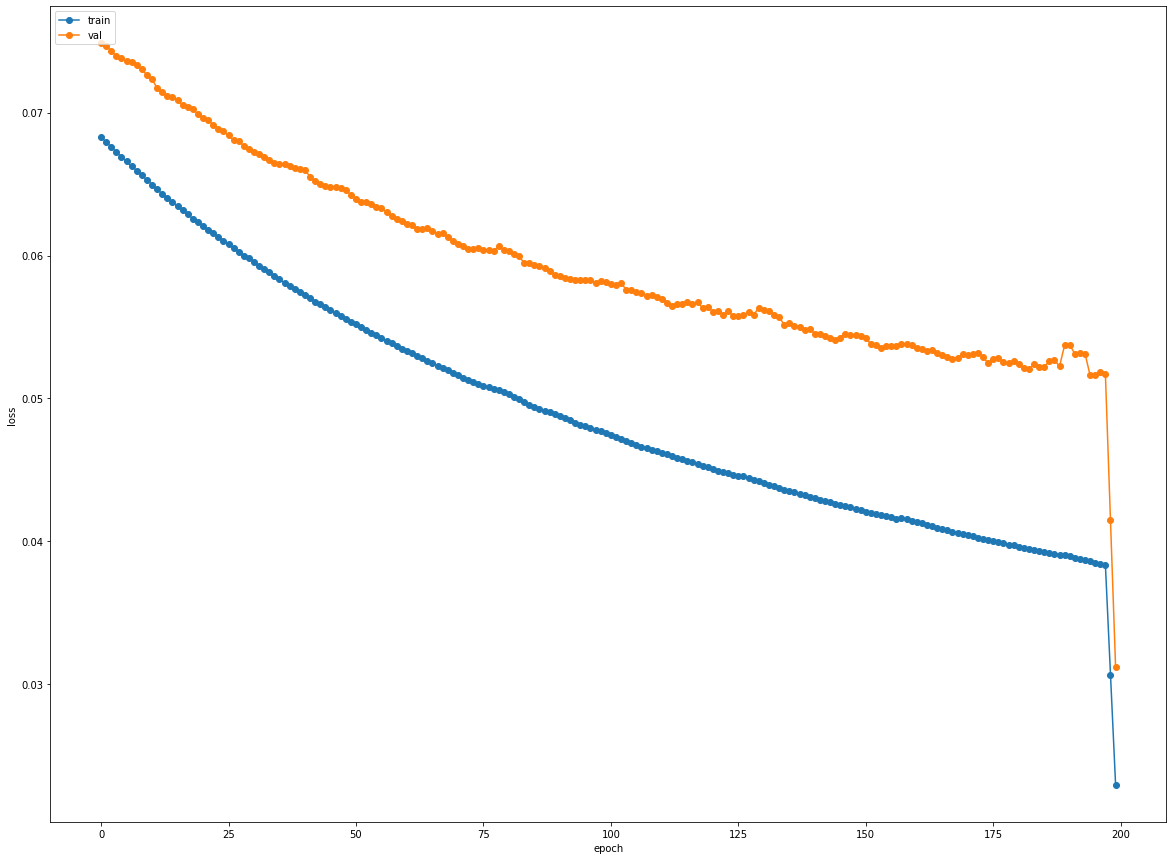

In [208]:
plt.plot(box_smooth(solver.train_loss_history, 5)[100:], '-o')
plt.plot(box_smooth(solver.val_loss_history,5)[100:], '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [211]:
chkpt = torch.load("./backups/0.01_last_300.pth")

options2 = {
    "train_data_loader": {
        "shuffle": True,
        "batch_size": 64,
        "num_workers": 3
    },
    "val_data_loader": {
        "shuffle": True,
        "batch_size": 64,
        "num_workers": 3
    },
    "back_up_model_every": 50,
    "epochs": 100
}

net2 = LeNet1()
net2.load_state_dict(chkpt["model_state"])
optimizer2 = optim.SGD(net2.parameters(), lr=learning_rate)
optimizer2.load_state_dict(chkpt["optimizer_state"])

solver2 = Solver(net2, train_set, val_set, **options2)
solver2.train_loss_history = chkpt["train_loss"]
solver2.val_loss_history = chkpt["val_loss"]

solver2.train(optimizer, start_i=300)

Training for 100 epochs
Epoch[300]  train_loss=0.03778752434731978  val_loss=0.0512828417834203
Epoch[301]  train_loss=0.03778859900305872  val_loss=0.05130315756804909
Epoch[302]  train_loss=0.03777633002891308  val_loss=0.05155351124170005
Epoch[303]  train_loss=0.03781550165975604  val_loss=0.05178665694525572
Epoch[304]  train_loss=0.03784055385620707  val_loss=0.05125791697234959
Epoch[305]  train_loss=0.03777375818698255  val_loss=0.05201249581221847
Epoch[306]  train_loss=0.03779870540182323  val_loss=0.051329751377391396
Epoch[307]  train_loss=0.037789162076280816  val_loss=0.05128408460077017
Epoch[308]  train_loss=0.03777670369857489  val_loss=0.051326196339681364
Epoch[309]  train_loss=0.03777263033792705  val_loss=0.05141902969598438
Epoch[310]  train_loss=0.03779539798863966  val_loss=0.05140074001844664
Epoch[311]  train_loss=0.037830747360580355  val_loss=0.05236797485571758
Epoch[312]  train_loss=0.037776941808400306  val_loss=0.051299768728411695
Epoch[313]  train_loss

In [ ]:
plt.plot(solver2.train_loss_history[-100:], '-o')
plt.plot(solver2.val_loss_history[-100:], '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [216]:
chkpt = torch.load("./backups/0.01_300_300.pth")

options3 = {
    "train_data_loader": {
        "shuffle": True,
        "batch_size": 64,
        "num_workers": 3
    },
    "val_data_loader": {
        "shuffle": True,
        "batch_size": 64,
        "num_workers": 3
    },
    "back_up_model_every": 50,
    "epochs": 100
}

net3 = LeNet1()
net3.load_state_dict(chkpt["model_state"])
optimizer3 = optim.SGD(net3.parameters(), lr=.0001)
optimizer3.load_state_dict(chkpt["optimizer_state"])

solver3 = Solver(net3, train_set, val_set, **options2)
solver3.train_loss_history = chkpt["train_loss"]
solver3.val_loss_history = chkpt["val_loss"]

solver3.train(optimizer, start_i=300)

Training for 100 epochs
Epoch[300]  train_loss=0.03786325062204705  val_loss=0.05159568498919534
Epoch[301]  train_loss=0.037785151147145465  val_loss=0.051426876388241054
Epoch[302]  train_loss=0.03791345269722945  val_loss=0.051278631437190206
Epoch[303]  train_loss=0.03784155791156146  val_loss=0.05172903806113514
Epoch[304]  train_loss=0.03777511683596379  val_loss=0.05126579492323243
Epoch[305]  train_loss=0.037808990766368136  val_loss=0.05126807514791656
Epoch[306]  train_loss=0.03784023569908727  val_loss=0.05181492156360987
Epoch[307]  train_loss=0.03783477752533791  val_loss=0.051262013347238115
Epoch[308]  train_loss=0.03780906555323821  val_loss=0.05260161008347704
Epoch[309]  train_loss=0.037846018074918775  val_loss=0.05131407311203991
Epoch[310]  train_loss=0.0377784565000621  val_loss=0.05125756152003861
Epoch[311]  train_loss=0.03780597060992647  val_loss=0.05143786951970712
Epoch[312]  train_loss=0.03777887104728195  val_loss=0.051320900965576906
Epoch[313]  train_los

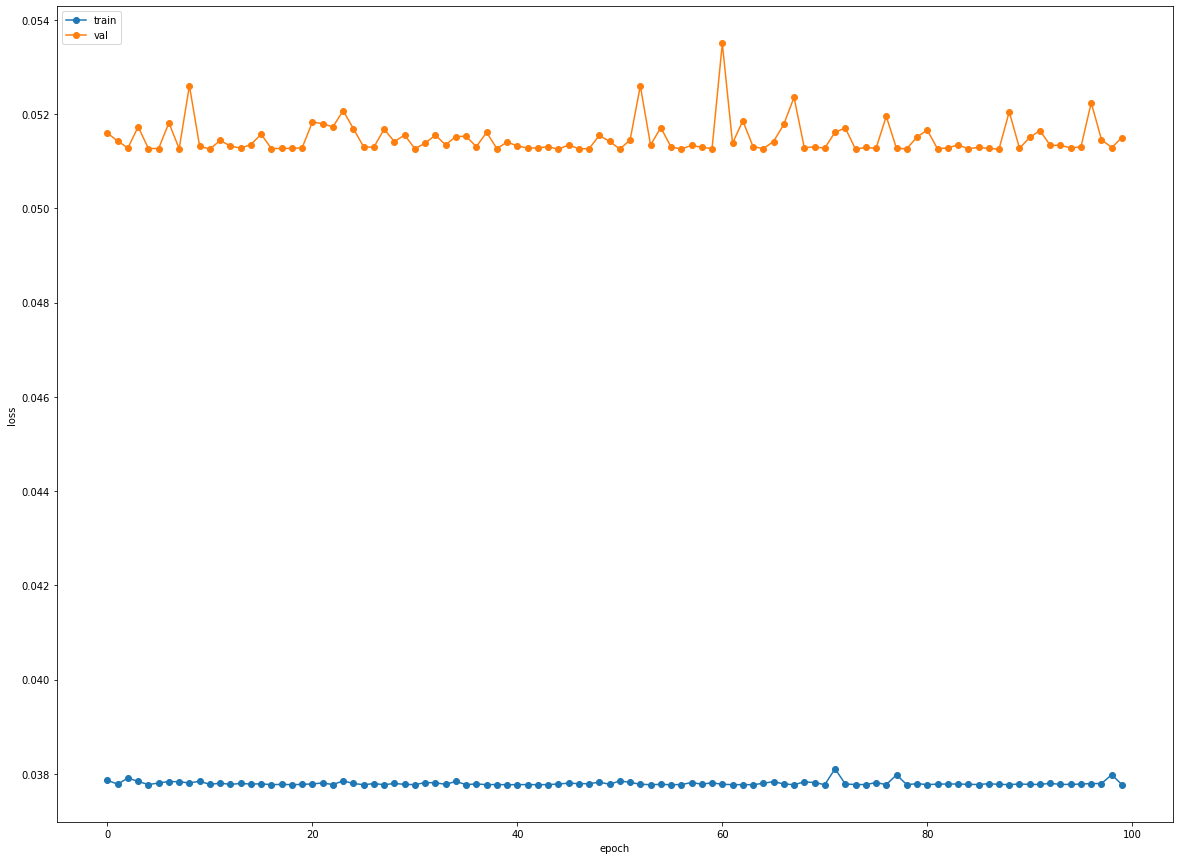

In [217]:
plt.plot(solver3.train_loss_history[-100:], '-o')
plt.plot(solver3.val_loss_history[-100:], '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [16]:
chkpt = torch.load("./backups/0.01_300_300.pth")

loader_opts = {
    "batch_size": 64,
    "num_workers": 6
}
final_loader = torch.utils.data.DataLoader(dataset = test_set, **loader_opts)

final_model = LeNet1()
final_model.load_state_dict(chkpt["model_state"])
final_model.eval()

train_acc = -1
with torch.no_grad():
    correct = 0
    total = 0

    for (inputs, labels) in final_loader:
        out = final_model(inputs)
        predicted = torch.argmax(out.data, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

final_acc = correct / total

print("Trained model prediction accuracy: {}%".format(final_acc * 100))

Trained model prediction accuracy: 98.61999999999999%
